In [47]:
import pandas as pd

df = pd.read_csv("bankPayments.csv")
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [48]:
import seaborn as sns
import numpy as np
import torch
from torch import nn

In [49]:
df1 = df[["gender", "fraud"]]
df1.groupby("gender").aggregate('sum')

,fraud
gender,
'E',7
'F',4758
'M',2435
'U',0


In [50]:
df2 = df[["category", "fraud"]]
df2.groupby("category").aggregate('sum')

,fraud
category,
'es_barsandrestaurants',120
'es_contents',0
'es_fashion',116
'es_food',0
'es_health',1696
'es_home',302
'es_hotelservices',548
'es_hyper',280
'es_leisure',474


c:\Users\oscar\anaconda3\envs\ml-0451\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='amount', ylabel='Count'>

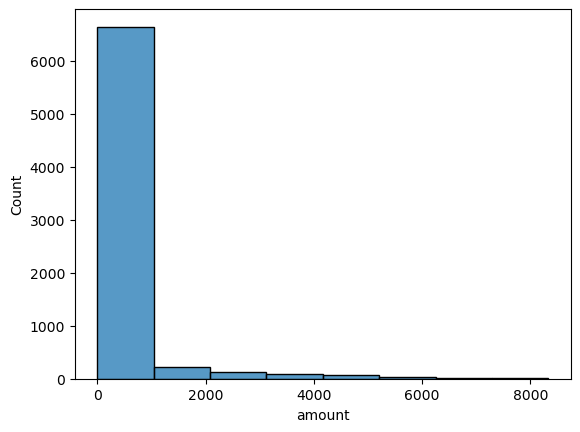

In [51]:
df3 = df[["amount", "fraud"]]
df3 = df3[df3["fraud"] == 1]
sns.histplot(data=df3, x="amount", bins=8)
#df3['cat_age'] = np.select([df2.amount < 2000, df2.amount < 4000, df2.amount < 6000, df2.amount < 8000], ['<2000', '2000-4000','4000-6000','6000-8000'], '>8000')

In [52]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [53]:
from sklearn import model_selection
features = ['gender', 'category', 'amount']

X = df[features]
X = pd.get_dummies(X, dtype= float)
y = df['fraud']

n_features = X.shape[1]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33)

X_train = torch.tensor(X_train.values, dtype= torch.float)
X_test = torch.tensor(X_test.values, dtype= torch.float)
y_train = torch.tensor(y_train.values, dtype= torch.float)
y_test = torch.tensor(y_test.values, dtype= torch.float)


In [54]:
from logRegModel import LogisticRegression

# instantiating logistic regression model
LR = LogisticRegression(n_features)

# loss and optimizer
alpha = 0.0001
criterion = nn.BCELoss()
opt = torch.optim.SGD(LR.parameters(), lr = alpha)

In [55]:
# training loop
n_epochs = 1000

for epoch in range(n_epochs):

    y_preds = LR(X_train)
    
    loss = criterion(y_preds, y_train.unsqueeze(-1))
    
    # auto gradient descent
    loss.backward()

    # update w
    opt.step()

    # zero gradient
    opt.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}, Loss = {loss.item():.3f}')

preds = LR(X_train)


Epoch: 10, Loss = 5.495
Epoch: 20, Loss = 4.155
Epoch: 30, Loss = 2.878
Epoch: 40, Loss = 1.860
Epoch: 50, Loss = 1.177
Epoch: 60, Loss = 0.757
Epoch: 70, Loss = 0.669
Epoch: 80, Loss = 0.631
Epoch: 90, Loss = 0.610
Epoch: 100, Loss = 0.596
Epoch: 110, Loss = 0.586
Epoch: 120, Loss = 0.579
Epoch: 130, Loss = 0.574
Epoch: 140, Loss = 0.570
Epoch: 150, Loss = 0.568
Epoch: 160, Loss = 0.566
Epoch: 170, Loss = 0.565
Epoch: 180, Loss = 0.564
Epoch: 190, Loss = 0.564
Epoch: 200, Loss = 0.564
Epoch: 210, Loss = 0.564
Epoch: 220, Loss = 0.564
Epoch: 230, Loss = 0.565
Epoch: 240, Loss = 0.566
Epoch: 250, Loss = 0.567
Epoch: 260, Loss = 0.568
Epoch: 270, Loss = 0.570
Epoch: 280, Loss = 0.571
Epoch: 290, Loss = 0.572
Epoch: 300, Loss = 0.574
Epoch: 310, Loss = 0.575
Epoch: 320, Loss = 0.577
Epoch: 330, Loss = 0.578
Epoch: 340, Loss = 0.580
Epoch: 350, Loss = 0.581
Epoch: 360, Loss = 0.583
Epoch: 370, Loss = 0.585
Epoch: 380, Loss = 0.586
Epoch: 390, Loss = 0.588
Epoch: 400, Loss = 0.590
Epoch: 41